In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train.csv', encoding='latin-1')

print(train.shape)

(99989, 3)


In [3]:
pd.options.display.max_colwidth = 100
train.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4,5,0,i think mi bf is cheating on me!!! T_T
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| TV Tonight
8,9,1,handed in my uniform today . i miss you already
9,10,1,hmmmm.... i wonder how she my number @-)


In [4]:
import string
import re
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')

additional_stop_words = ['rt','via','...','http','twitpic','tinyurl','www', 'amp']
stopwords_list = stopwords_english + additional_stop_words
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    
    #identify negations
    tweet = re.sub("not|dont|don't|doesnt|doesn't|aint|ain't|isnt|isn't|arent|aren't", "negg", tweet)
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    #remove mentions and usernames
    tweet = re.sub("(@[A-Za-z0-9]+)", " ", tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    tweet= re.sub("[^a-zA-Z]", " ", tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_list and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean

In [5]:
train['normalized'] = train.SentimentText.apply(clean_tweets)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [6]:
train.head()

,ItemID,Sentiment,SentimentText,normalized,normal
0,1,0,is so sad for my APL friend.............,"[sad, apl, friend]",sad apl friend
1,2,0,I missed the New Moon trailer...,"[miss, new, moon, trailer]",miss new moon trailer
2,3,1,omg its already 7:30 :O,"[omg, alreadi]",omg alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...,"[omgaga, im, sooo, im, gunna, cri, dentist, sinc, supos, get, crown, put, min]",omgaga im sooo im gunna cri dentist sinc supos get crown put min
4,5,0,i think mi bf is cheating on me!!! T_T,"[think, mi, bf, cheat]",think mi bf cheat


In [7]:
train.tail(20)

,ItemID,Sentiment,SentimentText,normalized,normal
99969,99981,0,@CTerry1985 Sorry,[sorri],sorri
99970,99982,0,"@CTerry1985 damn it, dont have sky","[damn, negg, sky]",damn negg sky
99971,99983,0,@CTerry1985 That's the thing; the new raft of Star Wars films were just a raft of #EpicFail s,"[thing, new, raft, star, war, film, raft, epicfail]",thing new raft star war film raft epicfail
99972,99984,1,@cthagod,[],
99973,99985,1,@ctham #FollowFriday,[followfriday],followfriday
99974,99986,0,"@ctham #awaresg You are not wrong. But from a my own male point of view, I felt excluded (even w...","[awaresg, negg, wrong, male, point, view, felt, exclud, even, non, repli, thread]",awaresg negg wrong male point view felt exclud even non repli thread
99975,99987,0,@ctham @mommyfizz cuz you big burly man. hahahahahahahahaha,"[cuz, big, burli, man, hahahahahahahahaha]",cuz big burli man hahahahahahahahaha
99976,99988,1,@ctham @Wilsurn Trying to get a wider range of shirts to suit everyone. Please make requests if ...,"[tri, get, wider, rang, shirt, suit, everyon, pleas, make, request, need, awaresg]",tri get wider rang shirt suit everyon pleas make request need awaresg
99977,99989,1,@ctham Haha I love the passion in your support,"[haha, love, passion, support]",haha love passion support
99978,99990,1,"@cthulhullahoop That sucks...I like living in Coopersville, I don't need no special bags or anyt...","[suck, like, live, coopersvil, negg, need, special, bag, anyth]",suck like live coopersvil negg need special bag anyth


In [8]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])

tfidfconverter = TfidfTransformer()  
tfid_data = tfidfconverter.fit_transform(vectorized_data)

indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

#vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#final_features = vectorizer.fit_transform(train['normal'])

#indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))
#indexed_data =hstack((np.array(range(0,final_features.shape[0]))[:,None],final_features))

#vectorized_data.shape
tfid_data.shape
#final_features.shape

(99989, 404205)

In [9]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.2,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [31]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(fit_prior=True, alpha=1.0).fit(data_train, targets_train)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nb_pred = nbc.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))
print(f1_score(targets_test, nb_pred))

[[ 4395  4286]
 [ 1096 10221]]
              precision    recall  f1-score   support

           0       0.80      0.51      0.62      8681
           1       0.70      0.90      0.79     11317

    accuracy                           0.73     19998
   macro avg       0.75      0.70      0.71     19998
weighted avg       0.75      0.73      0.72     19998

0.7308730873087309
0.791589219330855


In [33]:
########################################linear svm
from sklearn.svm import LinearSVC
lsvm= LinearSVC(C=1.0)
lsvm.fit(data_train, targets_train)

LinearSVC()

In [34]:
from sklearn.metrics import f1_score

targets_pred = lsvm.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))
print(f1_score(targets_test, targets_pred))

[[5686 2995]
 [2028 9289]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      8681
           1       0.76      0.82      0.79     11317

    accuracy                           0.75     19998
   macro avg       0.75      0.74      0.74     19998
weighted avg       0.75      0.75      0.75     19998

0.7488248824882489
0.7871700351680013


In [44]:
#########################################################
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(C=1.0, random_state=0)
lrc.fit(data_train, targets_train)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

targets_pred = lrc.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))
print(f1_score(targets_test, targets_pred))

[[5551 3130]
 [1758 9559]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      8681
           1       0.75      0.84      0.80     11317

    accuracy                           0.76     19998
   macro avg       0.76      0.74      0.75     19998
weighted avg       0.76      0.76      0.75     19998

0.7555755575557556
0.7963842372740148


In [38]:
###################################################################################
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=100)
rfc.fit(data_train, targets_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [39]:
rfy_pred = rfc.predict(data_test)

print(confusion_matrix(targets_test, rfy_pred))
print(classification_report(targets_test, rfy_pred))
print(accuracy_score(targets_test, rfy_pred))
print(f1_score(targets_test, rfy_pred))

[[ 2638  6043]
 [  422 10895]]
              precision    recall  f1-score   support

           0       0.86      0.30      0.45      8681
           1       0.64      0.96      0.77     11317

    accuracy                           0.68     19998
   macro avg       0.75      0.63      0.61     19998
weighted avg       0.74      0.68      0.63     19998

0.6767176717671767
0.7711909396566978


In [40]:
from sklearn.model_selection import GridSearchCV

hiperparameters = {'C': (0.01,0.1,1.0,10.0,100.0)}
grid = GridSearchCV(LogisticRegression(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

{'C': 10.0}
0.7527597160196087


C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 2.0, 'fit_prior': False}
0.740495873369357


In [47]:
nb = MultinomialNB(fit_prior=False, alpha=2.0).fit(data_train, targets_train)

In [48]:
nb_pred = nb.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))
print(f1_score(targets_test, nb_pred))

[[5729 2952]
 [2148 9169]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      8681
           1       0.76      0.81      0.78     11317

    accuracy                           0.74     19998
   macro avg       0.74      0.74      0.74     19998
weighted avg       0.74      0.74      0.74     19998

0.744974497449745
0.7824046420343033


In [49]:
hiperparameters = {'C': (0.01,0.1,1.0,5.0,10.0)}
grid = GridSearchCV(LinearSVC(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1}
0.7505594753677071


In [50]:
lsvc= LinearSVC(C=0.1)
lsvc.fit(data_train, targets_train)

LinearSVC(C=0.1)

In [51]:
targets_pred = lsvc.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))
print(f1_score(targets_test, targets_pred))

[[5481 3200]
 [1703 9614]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      8681
           1       0.75      0.85      0.80     11317

    accuracy                           0.75     19998
   macro avg       0.76      0.74      0.74     19998
weighted avg       0.76      0.75      0.75     19998

0.7548254825482549
0.7968173718453442


In [ ]:
[[5551 3130]
 [1758 9559]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      8681
           1       0.75      0.84      0.80     11317

    accuracy                           0.76     19998
   macro avg       0.76      0.74      0.75     19998
weighted avg       0.76      0.76      0.75     19998

0.7555755575557556
0.7963842372740148

In [52]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, targets_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

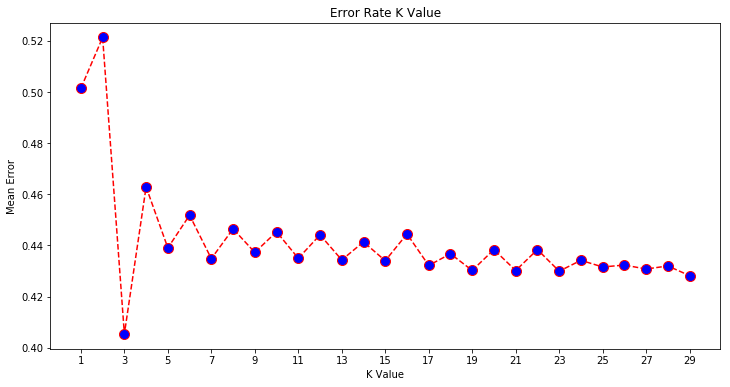

In [53]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(1,30,2), np.arange(1,30,2))
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [54]:
kn = KNeighborsClassifier(n_neighbors=3)  
kn.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

ky_pred = kn.predict(data_test)

print(confusion_matrix(targets_test, ky_pred))
print(classification_report(targets_test, ky_pred))
print(accuracy_score(targets_test, ky_pred))
print(f1_score(targets_test, ky_pred))

[[  901  7780]
 [  327 10990]]
              precision    recall  f1-score   support

           0       0.73      0.10      0.18      8681
           1       0.59      0.97      0.73     11317

    accuracy                           0.59     19998
   macro avg       0.66      0.54      0.46     19998
weighted avg       0.65      0.59      0.49     19998

0.5946094609460946
0.7305480772426629


In [20]:
##Linear regression wins
######################################################### test model with new data
test = pd.read_csv('C:\\Users\\guilh_000\\Documents\\tweetsclassify\\testing.csv')
test.shape

(22, 3)

In [21]:
test['normalized'] = test.Text.apply(clean_tweets)
test['normal'] = [' '.join(map(str, l)) for l in test['normalized']]

In [22]:
test.head(10)

,TweetID,Text,Label,normalized,normal
0,1,I am feeling so depressed,0,"[feel, depress]",feel depress
1,2,I'm so sad. i can't stop crying,0,"[sad, stop, cri]",sad stop cri
2,3,I don't feel good at all,0,"[negg, feel, good]",negg feel good
3,4,I dont feel good at all,0,"[negg, feel, good]",negg feel good
4,5,I'm feeling so good,1,"[feel, good]",feel good
5,6,If I just breath now And close my eyes Maybe it'll go away #depression #mentalhealth #MentalHeal...,0,"[breath, close, eye, mayb, go, away, depress, mentalhealth, mentalhealthawar]",breath close eye mayb go away depress mentalhealth mentalhealthawar
6,7,I am not sad I'm depressed all of a sudden I get this urge feeling of sadness I hope I can stop ...,0,"[negg, sad, depress, sudden, get, urg, feel, sad, hope, stop, believ, negg, fuckin, loop, trap, ...",negg sad depress sudden get urg feel sad hope stop believ negg fuckin loop trap deep depress sad...
7,8,I got the job I wanted. I'm really happy right now :),1,"[got, job, want, realli, happi, right]",got job want realli happi right
8,9,Holidays can't come soon enough,1,"[holiday, come, soon, enough]",holiday come soon enough
9,10,"My anxiety has been extremely bad lately. If you are suffering, you are not alone",0,"[anxieti, extrem, bad, late, suffer, negg, alon]",anxieti extrem bad late suffer negg alon


In [27]:
tweet_to_predict = test['normal']
x = count_vectorizer.transform(tweet_to_predict)
xdata = tfidfconverter.transform(x)

In [28]:
test['Prediction'] = lrc.predict(xdata)

In [29]:
test

,TweetID,Text,Label,normalized,normal,Prediction
0,1,I am feeling so depressed,0,"[feel, depress]",feel depress,0
1,2,I'm so sad. i can't stop crying,0,"[sad, stop, cri]",sad stop cri,0
2,3,I don't feel good at all,0,"[negg, feel, good]",negg feel good,0
3,4,I dont feel good at all,0,"[negg, feel, good]",negg feel good,0
4,5,I'm feeling so good,1,"[feel, good]",feel good,0
5,6,If I just breath now And close my eyes Maybe it'll go away #depression #mentalhealth #MentalHeal...,0,"[breath, close, eye, mayb, go, away, depress, mentalhealth, mentalhealthawar]",breath close eye mayb go away depress mentalhealth mentalhealthawar,0
6,7,I am not sad I'm depressed all of a sudden I get this urge feeling of sadness I hope I can stop ...,0,"[negg, sad, depress, sudden, get, urg, feel, sad, hope, stop, believ, negg, fuckin, loop, trap, ...",negg sad depress sudden get urg feel sad hope stop believ negg fuckin loop trap deep depress sad...,0
7,8,I got the job I wanted. I'm really happy right now :),1,"[got, job, want, realli, happi, right]",got job want realli happi right,1
8,9,Holidays can't come soon enough,1,"[holiday, come, soon, enough]",holiday come soon enough,1
9,10,"My anxiety has been extremely bad lately. If you are suffering, you are not alone",0,"[anxieti, extrem, bad, late, suffer, negg, alon]",anxieti extrem bad late suffer negg alon,0


In [30]:
print(confusion_matrix(test['Label'], test['Prediction']))
print(classification_report(test['Label'], test['Prediction']))
print(accuracy_score(test['Label'], test['Prediction']))

[[11  0]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.73      0.84        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22

0.8636363636363636
